# Comparative Analysis
In this notebook, we compare ClaSS with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
p_values = (1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100)
methods = list()

for p_value in p_values:
    candidate_name = f"{p_value}-p_value"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/p_value/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,1e-10-p_value,1e-20-p_value,1e-30-p_value,1e-40-p_value,1e-50-p_value,1e-60-p_value,1e-70-p_value,1e-80-p_value,1e-90-p_value,1e-100-p_value
0,DodgerLoopDay,0.758,0.871,0.871,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,EEGRat,0.654,0.717,0.717,0.717,0.885,0.885,0.885,0.885,0.915,0.915
2,EEGRat2,0.576,0.576,0.576,0.739,0.739,0.739,0.737,0.739,0.739,0.739
3,FaceFour,0.583,0.722,0.785,0.741,0.741,0.741,0.741,0.741,0.804,0.581
4,GrandMalSeizures2,0.588,0.589,0.693,0.693,0.761,0.730,0.738,0.837,0.838,0.773
5,GreatBarbet1,0.346,0.605,0.879,0.879,0.877,0.857,0.991,0.989,0.989,0.986
6,Herring,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.744,0.745,0.608,0.358,0.358,0.358,0.358,0.358,0.358,0.358
8,InsectEPG1,0.178,0.255,0.356,0.420,0.751,0.753,0.753,0.752,0.753,0.752
9,MelbournePedestrian,0.591,0.725,0.757,0.904,0.943,0.944,0.944,0.945,0.987,0.987


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1312/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


1e-10-p_value     0.538
1e-20-p_value     0.667
1e-30-p_value     0.729
1e-40-p_value     0.731
1e-50-p_value     0.791
1e-60-p_value     0.758
1e-70-p_value     0.748
1e-80-p_value     0.752
1e-90-p_value     0.731
1e-100-p_value    0.718
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1312/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


1e-10-p_value     0.215
1e-20-p_value     0.192
1e-30-p_value     0.183
1e-40-p_value     0.177
1e-50-p_value     0.156
1e-60-p_value     0.175
1e-70-p_value     0.188
1e-80-p_value     0.207
1e-90-p_value     0.218
1e-100-p_value    0.219
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

1e-10-p_value:wins=1 rank=7.95238
1e-20-p_value:wins=3 rank=6.52381
1e-30-p_value:wins=3 rank=5.28571
1e-40-p_value:wins=5 rank=4.14286
1e-50-p_value:wins=7 rank=3.42857
1e-60-p_value:wins=6 rank=3.52381
1e-70-p_value:wins=7 rank=3.38095
1e-80-p_value:wins=6 rank=3.14286
1e-90-p_value:wins=10 rank=3.09524
1e-100-p_value:wins=8 rank=3.80952


Let's plot and output the ranks.

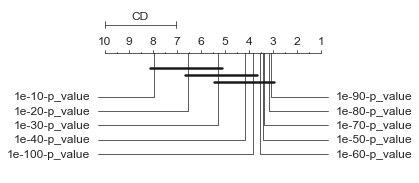

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5, filename="../../figures/cd_ablation_p_value.pdf")

Let's compute wins/losses against ClaSP.

In [13]:
selection = "1e-50-p_value"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

1e-50-p_value vs 1e-10-p_value: (wins/ties/losses): 17/1/3
1e-50-p_value vs 1e-20-p_value: (wins/ties/losses): 16/1/4
1e-50-p_value vs 1e-30-p_value: (wins/ties/losses): 13/1/7
1e-50-p_value vs 1e-40-p_value: (wins/ties/losses): 10/7/4
1e-50-p_value vs 1e-60-p_value: (wins/ties/losses): 5/11/5
1e-50-p_value vs 1e-70-p_value: (wins/ties/losses): 7/8/6
1e-50-p_value vs 1e-80-p_value: (wins/ties/losses): 6/8/7
1e-50-p_value vs 1e-90-p_value: (wins/ties/losses): 7/6/8
1e-50-p_value vs 1e-100-p_value: (wins/ties/losses): 8/6/7


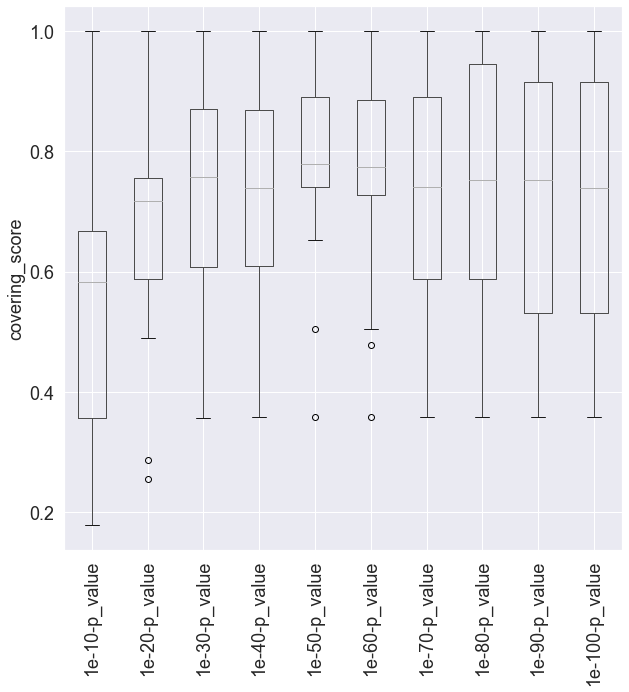

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig("../../figures/bp_ablation_p_value.pdf", bbox_inches="tight") 